# Mapas de calor y boxplots

In [2]:
import pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

# Leer el archivo utilizando read_csv
data = pd.read_csv("covid19_tweets.csv")

# Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.
Dado que no se puede concatenar str con str para las gráficas, se ocuparan las variables que son tipo int.

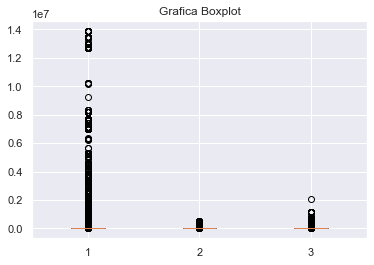

In [12]:
# Variables a trabajar
new_data = data[['user_followers','user_friends','user_favourites']]

# Diagrama de cajas
plt.boxplot(new_data)
plt.title('Grafica Boxplot')
plt.show()

array([[<AxesSubplot:title={'center':'user_followers'}>,
        <AxesSubplot:title={'center':'user_friends'}>],
       [<AxesSubplot:title={'center':'user_favourites'}>, <AxesSubplot:>]],
      dtype=object)

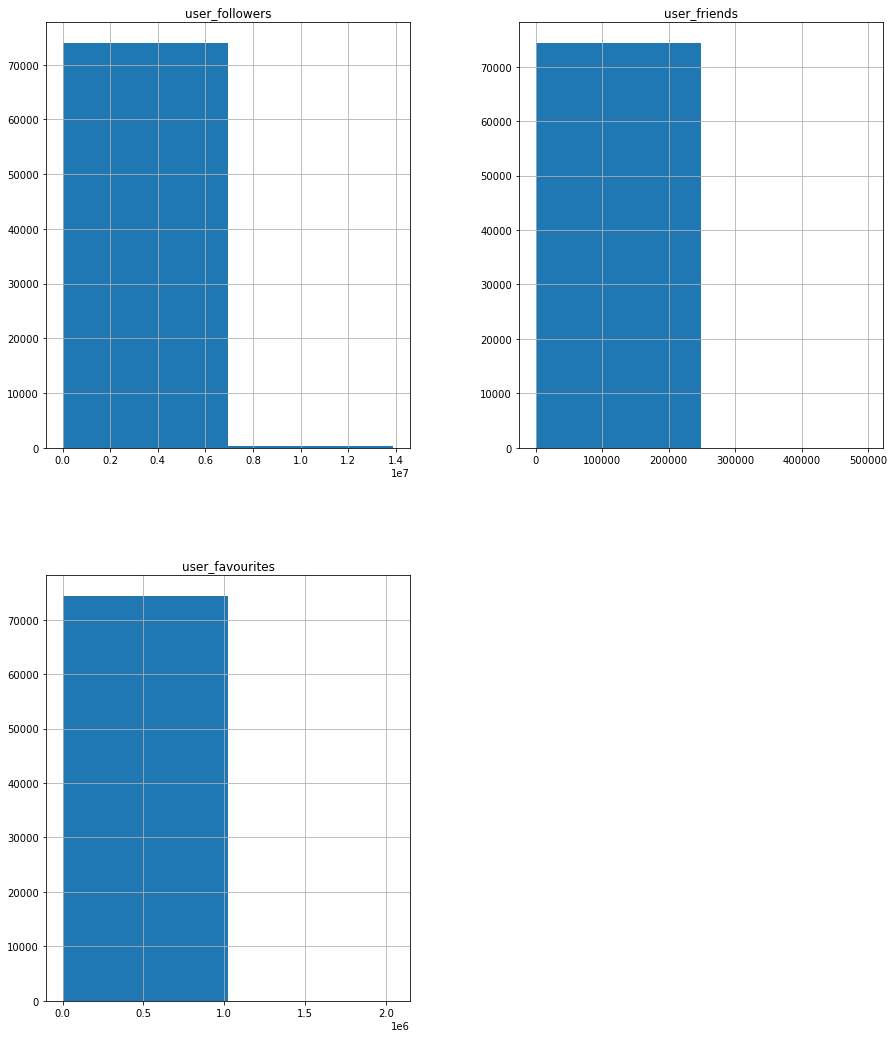

In [4]:
data.hist(figsize=(15,18), bins=2)

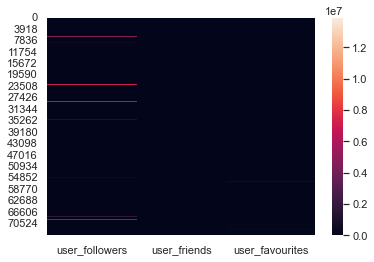

In [13]:
new_data = data[['user_followers','user_friends','user_favourites']]

np.random.seed(0)
sns.set_theme()

ax = sns.heatmap(new_data)

# ¿Hay alguna variable que no aporte información? 

Consideramos que todas las variables tienen información importante, menos “user_description” que hace referencia a la descripción de usuario que pone la persona en su perfil. Esto debido a que por ejemplo, la primera variable de “user_name” es relevante dado que es esencial registrar y saber la cadena de texto referente al nombre de usuario con el cual accede la persona a la plataforma Twitter. Además de que permite tener registrado cuántas personas han usado el mismo nombre. En cuanto a “user_location” sigue aportando información importante, ya que, consideramos que el registro del lugar de donde se creó la cuenta de usuario nos permite identificar de qué parte del mundo se encuentran más usuarios activos o de qué parte hay menos perfiles creados, además de que puede ayudar en el idioma. Por otro lado, “user_created” es útil para llevar un historial del perfil y antigüedad en la plataforma, a su vez tanto la variable “user_followers” como “user_friends” son importantes porque nos permite visualizar de una manera cuantitativa la cantidad de personas que seguimos y con las que se comparte un seguimiento mutuo, son parte de la esencia del perfil. La variable “user_favourites” sigue aportando información importante dado que te da un registro de los elementos que el usuario tiene como destacados y te puede dar información sobre los intereses del perfil de usuario. Para la variable “user_verified” a pesar de ser un dato booleano, sigue aportando información esencial porque da cierto destaque al perfil y la verificación de la cuenta puede arrojar otras variables dependientes como el hecho de la cantidad de seguidores para acceder a una verificación. A su vez, para variables como “date”, “text”, “hashtags”, “source” y “is_retweet” son variables que aportan dado que queda un registro del Tweet realizado y contiene información relevante por la fecha y hora a la que se realizó, su contenido, los hashtags que le dan más impulso a las publicaciones y desde qué dispositivo se realizó. Además de que es importante saber si el contenido compartido viene de la propia cuenta o es un reTweet de otra. 

Por lo que todas estas variables pueden aportar información relevante para hacer análisis de sus composiciones tanto en similitudes de datos como en cantidades de mayores seguidores o el contenido de los Tweets, entre más.

# Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué? 

La “user_description”, ya que en muchos casos se usan caracteres ilegibles que complican el análisis. Además de que no aporta información importante para el análisis del perfil de usuario, más que si la descripción coincide con otra. Pero en sí, no hace una diferencia dentro del perfil que aporte a su análisis.

# ¿Existen variables que tengan datos extraños?

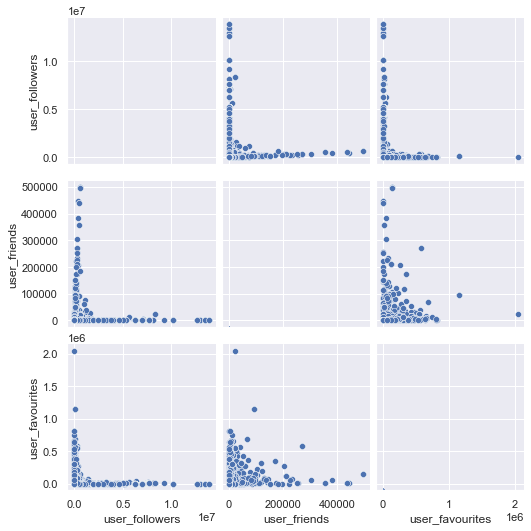

In [14]:
#Correlacion
new_data = data[['user_followers', 'user_friends', 'user_favourites']]
sns.pairplot(new_data)
plt.show()

# Si comparas las variables, ¿todas están en rangos similares?

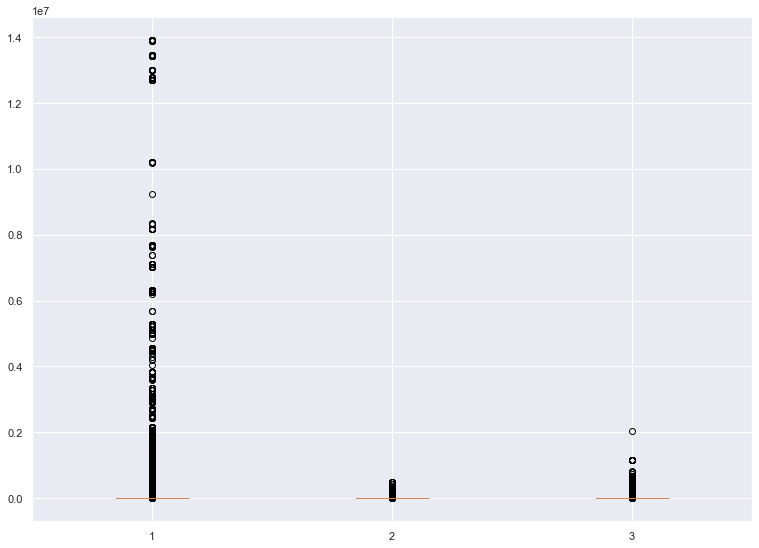

In [5]:
selected = data.iloc[:, [4, 5, 6]].sort_values(by="user_followers", ascending="True")

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(selected)
plt.show()

In [6]:
selected.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


Analizando los datos podemos observar que los únicos datos numéricos user_followers, user_favourites, user_friends, mientras que los otros datos son valores de texto o booleanos. Podemos analizar los valores con una gráfica de cajas para observar los rangos.

Al observar los datos obtenidos por el describe y la tabla de cajas podemos observar que los valores numéricos tienen un rango diferente. Es posible obervar que el valor de user_followers llega a valores mucho más altos que user_friends y user_favourites, lo que ocasiona que en la tabla de cajas no se pueda obtener información relevante de las últimas dos variables pues todos los datos se ven comprimidos en los valores más chicos. Incluso podemos observar que las cajas no se pueden observar claramente pues están en los valores más pequeños de la gráfica por lo que es difícil comparar la información correctamente.

# ¿Crees que esto afecte el análisis de los datos?

Aunque los datos no se encuentren en el mismo rango y sean diferentes tipos de dato, no debe afectar al análisis de los datos ya que es posible realizar diferntes métodos de análisis y de comparación de datos para obtener información relevante. 

# ¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?

Se pueden encontrar diferentes grupos parecidos que se pueden utilizar para expandir el análisis de los datos, por ejemplo, se pueden encontrar los datos generales de un usario obteniendo la media de sus valores al agruparlos por nombre de usuario.

In [7]:
# En esta gráfica se pueden encontrar los datos generales de cada usuario al agrupar todos los registros de un mismo usuario y obtener sus medias
data.groupby(by='user_name').mean()

,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_name,,,,,
Corona,149.0,916.0,200.0,0.0,0.0
!F,227.0,1533.0,14059.0,0.0,0.0
!Gau Khoeb,148.0,389.0,5770.0,0.0,0.0
!n$@n R@j₩!nd€R,38.0,33.0,1356.0,0.0,0.0
"""Dillinger"" (named after my penis), PhD.",46.0,254.0,2126.0,0.0,0.0
...,...,...,...,...,...
🧬snap! crackle! pop! Gene/CRISPRs!🧬,116.0,746.0,2733.0,0.0,0.0
🧶Keala🧶,314.0,1811.0,13258.0,0.0,0.0
🧶🧶🧶 unravellednurse 🧶🧶🧶,1429.0,1303.0,5112.0,0.0,0.0


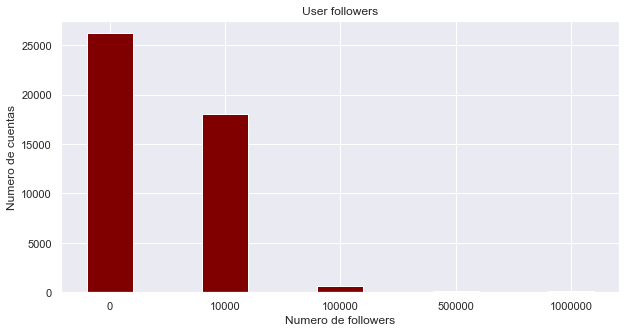

In [8]:
# Con esta gráfica podemos agrupar a los usuarios por su númeor de seguidores.
less_thou = data[data["user_followers"] < 1000].groupby("user_name").agg({"user_followers": np.mean}).sort_values(by='user_followers')
thou_hunthou = data[(data["user_followers"] > 1000) & (data["user_followers"] < 100000)].groupby("user_name").agg({"user_followers": np.mean}).sort_values(by='user_followers')
hunthou_fivehunthou = data[(data["user_followers"] > 100000) & (data["user_followers"] < 500000)].groupby("user_name").agg({"user_followers": np.mean}).sort_values(by='user_followers')
fivehunthou_mill = data[(data["user_followers"] > 500000) & (data["user_followers"] < 1000000)].groupby("user_name").agg({"user_followers": np.mean}).sort_values(by='user_followers')
more_mill = data[data["user_followers"] > 1000000].groupby("user_name").agg({"user_followers": np.mean}).sort_values(by='user_followers')

graph_data = {'0': len(less_thou), '10000': len(thou_hunthou), '100000': len(hunthou_fivehunthou), '500000': len(fivehunthou_mill), '1000000': len(more_mill)}

followers = list(graph_data.keys())
values = list(graph_data.values())

fig = plt.figure(figsize = (10, 5))
plt.xlabel("Numero de followers")
plt.ylabel("Numero de cuentas")

plt.bar(followers, values, color ='maroon', width = 0.4)

plt.title("User followers")
plt.show()

Se puede observar que la mayoría de las personas que han twiteado sobre el covid-19 tienen entre 0 y 10000 seguidores y el segundo grupo más grande es el grupo de 10000 a 100000 seguidores. Finalmente, es posible observar que hay menos cuentas con más de 100000 seguidores.

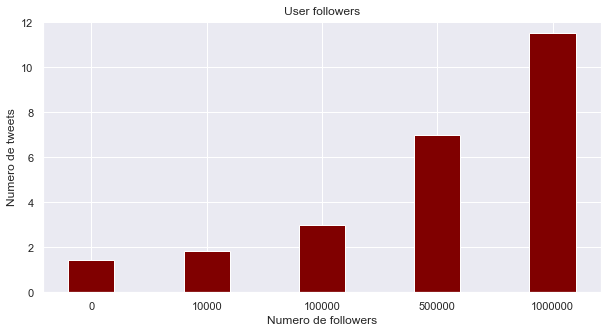

In [9]:
# Con esta gráfica podemos agrupar a los usuarios por el número de seguidores que tienen y agruparlos con la media del número de tweets que se han registrado de esos usuarios
less_thou = data[data["user_followers"] < 1000].groupby("user_name").agg({"user_followers": np.mean, "user_name": np.size}).sort_values(by='user_followers')
lt_mean = np.mean(less_thou.user_name)
thou_hunthou = data[(data["user_followers"] > 1000) & (data["user_followers"] < 100000)].groupby("user_name").agg({"user_followers": np.mean, "user_name": np.size}).sort_values(by='user_followers')
th_mean = np.mean(thou_hunthou.user_name)
hunthou_fivehunthou = data[(data["user_followers"] > 100000) & (data["user_followers"] < 500000)].groupby("user_name").agg({"user_followers": np.mean, "user_name": np.size}).sort_values(by='user_followers')
hf_mean = np.mean(hunthou_fivehunthou.user_name)
fivehunthou_mill = data[(data["user_followers"] > 500000) & (data["user_followers"] < 1000000)].groupby("user_name").agg({"user_followers": np.mean, "user_name": np.size}).sort_values(by='user_followers')
fm_mean = np.mean(fivehunthou_mill.user_name)
more_mill = data[data["user_followers"] > 1000000].groupby("user_name").agg({"user_followers": np.mean, "user_name": np.size}).sort_values(by='user_followers')
mm_mean = np.mean(more_mill.user_name)
graph_data = {'0': lt_mean, '10000': th_mean, '100000': hf_mean, '500000': fm_mean, '1000000': mm_mean}

followers = list(graph_data.keys())
values = list(graph_data.values())

fig = plt.figure(figsize = (10, 5))
plt.xlabel("Numero de followers")
plt.ylabel("Numero de tweets")

plt.bar(followers, values, color ='maroon', width = 0.4)

plt.title("User followers")
plt.show()

Es posible observar que al agrupar este caso, los datos cambian ya que entre mayor número de followers, se realizó un mayor número de tweets. 
Al realizar estas dos agrupaciones es posible ver que si es posible realizar análisis de datos aunque los rangosde  valores cambien y es posible encontrar correlaciones e información importante al agrupar la infromación, ya que se está trabajando con una gran cantidad de datos.